<a href="https://colab.research.google.com/github/jain777/Technical-Indicators-FA-Project/blob/main/MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p
ticker = 'AMD'
timeframe = '6m'
hdfc=pd.read_csv('/content/HDFCBANK.NS.csv')
print(hdfc.shape)

hdfc.index = hdfc["Date"].apply(lambda x: pd.Timestamp(x))
hdfc.drop("Date", axis=1, inplace=True)

hdfc.head()


(246, 7)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,945.250000,967.875000,945.250000,965.599976,951.427673,2298184
2018-04-03,961.974976,962.849976,955.500000,957.950012,943.889954,2039942
2018-04-04,956.474976,962.474976,939.224976,941.625000,927.804565,1857054
2018-04-05,950.650024,957.000000,945.099976,954.450012,940.441345,2429446
2018-04-06,956.099976,963.224976,952.900024,961.700012,947.584900,1860004


In [17]:
!pip install yfinance
!pip install ta


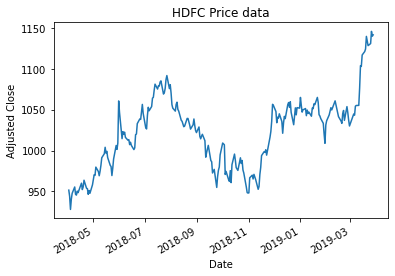

In [18]:
import yfinance as yf
import ta
from datetime import date, timedelta, datetime
from IPython.display import clear_output
#Visually show the stock price
hdfc['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("HDFC Price data")
plt.show()

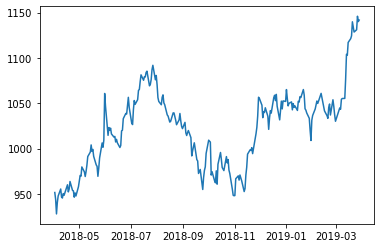

In [19]:
#df = p.chartDF(ticker, timeframe)
hdfc_y = hdfc[['Adj Close']]
hdfc_y.reset_index(level=0, inplace=True)
hdfc_y.columns=['ds','y']
plt.plot(hdfc_y.ds, hdfc_y.y, label='AMD')
plt.show()


In [20]:
hdfc_y.head()

,ds,y
0,2018-04-02,951.427673
1,2018-04-03,943.889954
2,2018-04-04,927.804565
3,2018-04-05,940.441345
4,2018-04-06,947.584900


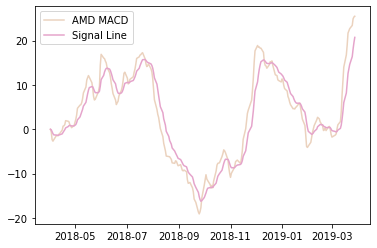

In [21]:
exp1 = hdfc_y.y.ewm(span=12, adjust=False).mean()
exp2 = hdfc_y.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.plot(hdfc_y.ds, macd, label='AMD MACD', color = '#EBD2BE')
plt.plot(hdfc_y.ds, exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

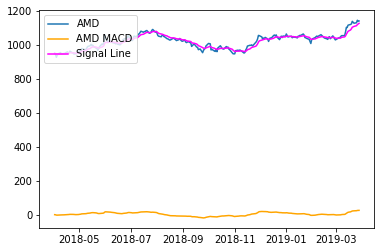

In [22]:
exp1 = hdfc_y.y.ewm(span=12, adjust=False).mean()
exp2 = hdfc_y.y.ewm(span=26, adjust=False).mean()
exp3 = hdfc_y.y.ewm(span=9, adjust=False).mean()
macd = exp1-exp2
plt.plot(hdfc_y.ds, hdfc_y.y, label='AMD')
plt.plot(hdfc_y.ds, macd, label='AMD MACD', color='orange')
plt.plot(hdfc_y.ds, exp3, label='Signal Line', color='Magenta')
plt.legend(loc='upper left')
plt.show()